<a href="https://colab.research.google.com/github/EdisonScience/AnimacionEncuestas2022/blob/main/Copy_of_TallerMachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Taller: Machine Learning

Autor: Sergio Diaz Paredes

Contacto: [Linkedin](https://www.linkedin.com/in/sergio-pedro-diaz-paredes-842b95163/)

# Dataset

In [ ]:
library(MASS)
data("Boston")

Contexto del dataset:

Los datos se recopilaron como parte de un estudio de investigación en 1978, realizado por Harrison, D., & Rubinfeld, D. L., titulado "Hedonic prices and the demand for clean air" (Precios hedónicos y la demanda de aire limpio).

El estudio se centró en analizar cómo factores específicos relacionados con las viviendas y el entorno afectaban sus precios en el mercado inmobiliario.
Boston fue el lugar de estudio, y se recopilaron datos de diferentes vecindarios en la ciudad.
Variables Principales:

La variable objetivo es medv, que representa el valor medio de las viviendas ocupadas por sus propietarios en miles de dólares.
Otras variables incluyen información sobre la tasa de criminalidad, la proporción de terreno residencial, la concentración de óxidos nítricos, el número promedio de habitaciones por vivienda, la antigüedad de las unidades, la accesibilidad a autopistas, la tasa de impuestos a la propiedad y más.

In [ ]:
head(Boston)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
6,0.02985,0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


- crim: Tasa de criminalidad per cápita por vecindario.
- zn: Proporción de terreno residencial dividido en zonas para lotes mayores a 25,000 pies cuadrados.
- indus: Proporción de acres de negocios no minoristas por vecindario.
- chas: Variable ficticia (dummy) para el río Charles; toma el valor 1 si un vecindario limita con el río y 0 en caso contrario.
- nox: Concentración de óxidos nítricos (partes por 10 millones).
- rm: Promedio de número de habitaciones por vivienda.
- age: Proporción de unidades ocupadas por sus propietarios construidas antes de 1940.
- dis: Distancia ponderada a centros de empleo en Boston.
- rad: Índice de accesibilidad a autopistas radiales.
- tax: Tasa de impuesto a la propiedad por $10,000.
- ptratio: Relación alumno-profesor por vecindario.
- black: Proporción de residentes afroamericanos por vecindario.
- lstat: Porcentaje de población de estatus bajo.
- medv: Valor medio de las viviendas ocupadas por sus propietarios en miles de dólares (la variable objetivo que se desea predecir).

# Paquete necesarios

## Para instalar

In [ ]:
install.packages("randomForest")
install.packages("rpart.plot")
install.packages("e1071")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘proxy’




## Para importar

In [ ]:
library(e1071)
library(rpart)
library(rpart.plot)
library(randomForest)

randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.



# Analisis exploratorio

In [ ]:
cor(Boston)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
crim,1.00000000,-0.20046922,0.40658341,-0.055891582,0.42097171,-0.21924670,0.35273425,-0.37967009,0.625505145,0.58276431,0.2899456,-0.38506394,0.4556215,-0.3883046
zn,-0.20046922,1.00000000,-0.53382819,-0.042696719,-0.51660371,0.31199059,-0.56953734,0.66440822,-0.311947826,-0.31456332,-0.3916785,0.17552032,-0.4129946,0.3604453
indus,0.40658341,-0.53382819,1.00000000,0.062938027,0.76365145,-0.39167585,0.64477851,-0.70802699,0.595129275,0.72076018,0.3832476,-0.35697654,0.6037997,-0.4837252
chas,-0.05589158,-0.04269672,0.06293803,1.000000000,0.09120281,0.09125123,0.08651777,-0.09917578,-0.007368241,-0.03558652,-0.1215152,0.04878848,-0.0539293,0.1752602
nox,0.42097171,-0.51660371,0.76365145,0.091202807,1.00000000,-0.30218819,0.73147010,-0.76923011,0.611440563,0.66802320,0.1889327,-0.38005064,0.5908789,-0.4273208
rm,-0.21924670,0.31199059,-0.39167585,0.091251225,-0.30218819,1.00000000,-0.24026493,0.20524621,-0.209846668,-0.29204783,-0.3555015,0.12806864,-0.6138083,0.6953599
age,0.35273425,-0.56953734,0.64477851,0.086517774,0.73147010,-0.24026493,1.00000000,-0.74788054,0.456022452,0.50645559,0.2615150,-0.27353398,0.6023385,-0.3769546
dis,-0.37967009,0.66440822,-0.70802699,-0.099175780,-0.76923011,0.20524621,-0.74788054,1.00000000,-0.494587930,-0.53443158,-0.2324705,0.29151167,-0.4969958,0.2499287
rad,0.62550515,-0.31194783,0.59512927,-0.007368241,0.61144056,-0.20984667,0.45602245,-0.49458793,1.000000000,0.91022819,0.4647412,-0.44441282,0.4886763,-0.3816262
tax,0.58276431,-0.31456332,0.72076018,-0.035586518,0.66802320,-0.29204783,0.50645559,-0.53443158,0.910228189,1.00000000,0.4608530,-0.44180801,0.5439934,-0.4685359


## medv vs lstat

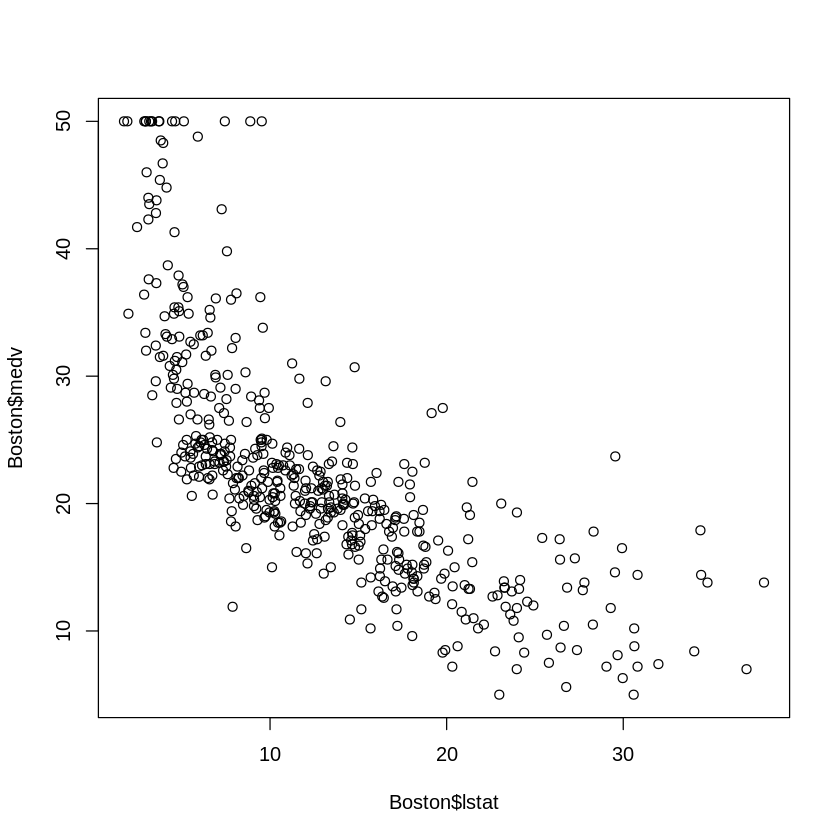

In [ ]:
plot(Boston$lstat,Boston$medv)

# Modelos de regresion

## Regresion lineal

In [ ]:
modelo_lineal <- lm(medv ~ lstat,Boston)
summary(modelo_lineal)


Call:
lm(formula = medv ~ lstat, data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.168  -3.990  -1.318   2.034  24.500 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 34.55384    0.56263   61.41   <2e-16 ***
lstat       -0.95005    0.03873  -24.53   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.216 on 504 degrees of freedom
Multiple R-squared:  0.5441,	Adjusted R-squared:  0.5432 
F-statistic: 601.6 on 1 and 504 DF,  p-value: < 2.2e-16


In [ ]:
rango_lstat = data.frame(lstat=seq(0,40,0.1))
rango_lstat_x = seq(0,40,0.1)

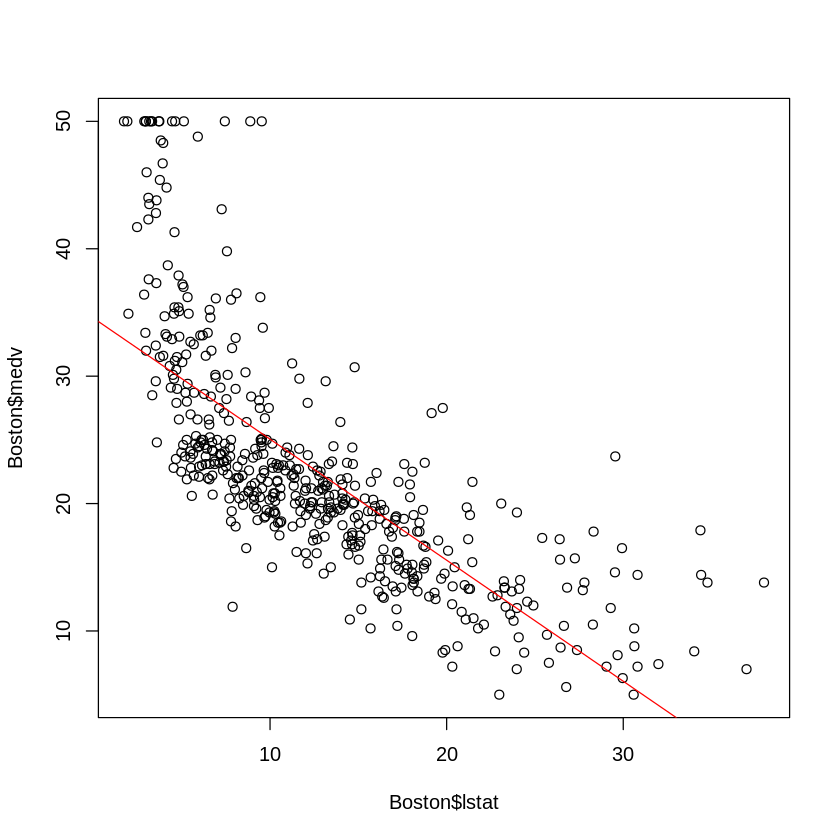

In [ ]:
plot(Boston$lstat,Boston$medv)
lines(rango_lstat_x,predict(modelo_lineal,newdata = rango_lstat),col="red")

## Maquina de soporte vectorial (SVM)

In [ ]:
modelo_svm <- svm(medv ~ lstat, data = Boston, kernel = "linear")#linear,polynomial, radial, sigmoid

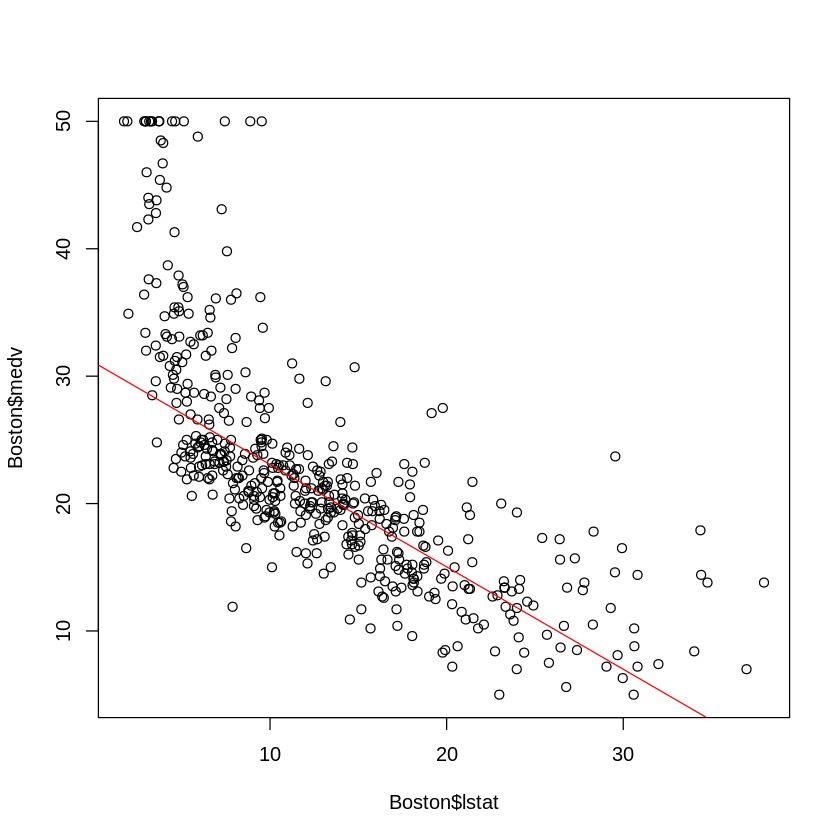

In [ ]:
plot(Boston$lstat,Boston$medv)
lines(rango_lstat_x,predict(modelo_svm,newdata = rango_lstat),col="red")

## Arbol de regresión

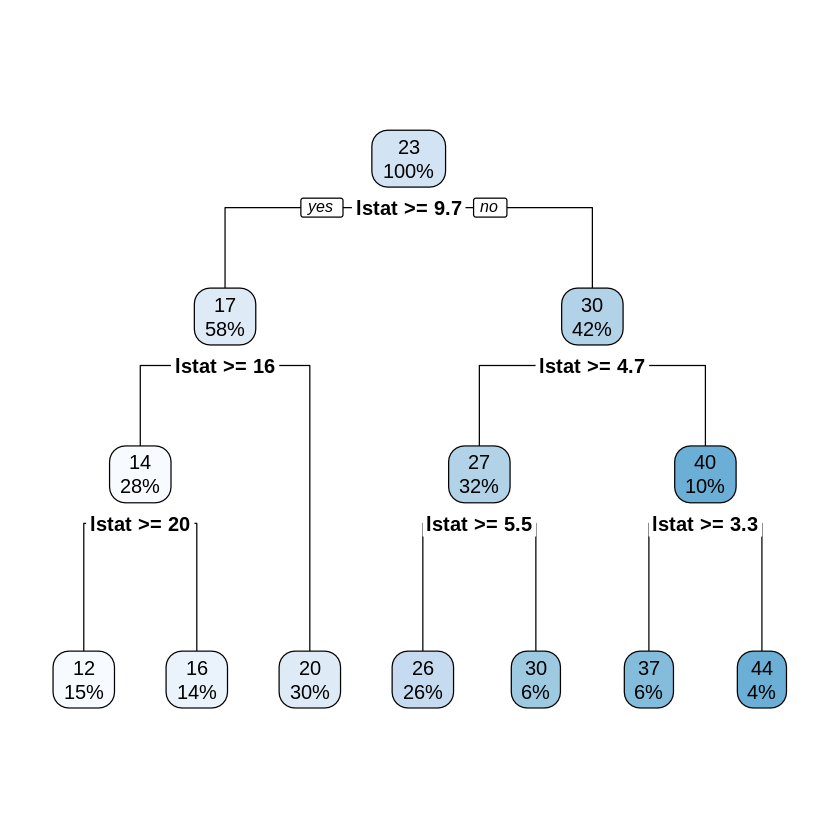

In [ ]:
modelo_tree <- rpart(medv ~ lstat, data = Boston, method = "anova")
rpart.plot(modelo_tree)

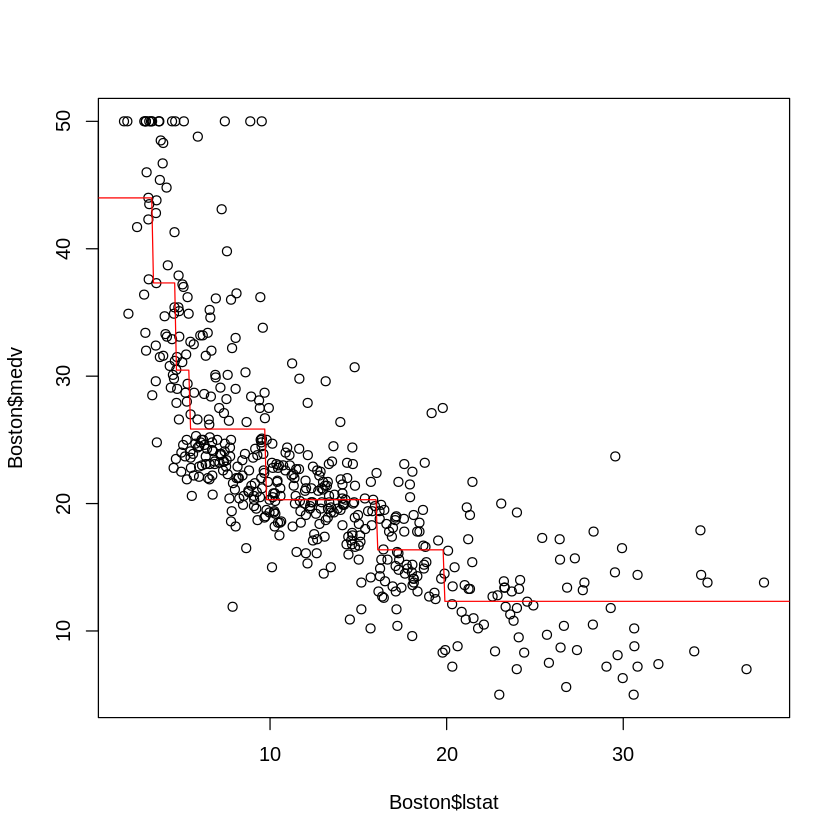

In [ ]:
plot(Boston$lstat,Boston$medv)
lines(rango_lstat_x,predict(modelo_tree,newdata = rango_lstat),col="red")

## Random forest

In [ ]:
modelo_randf <- randomForest(medv ~ lstat, data = Boston, ntree = 20)

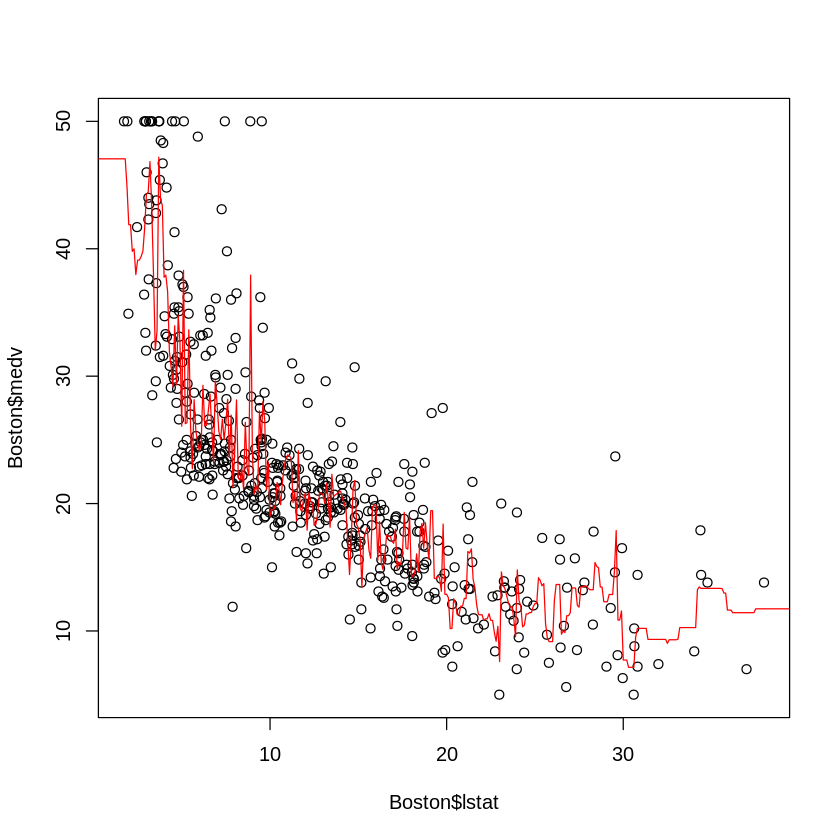

In [ ]:
plot(Boston$lstat,Boston$medv)
lines(rango_lstat_x,predict(modelo_randf,newdata = rango_lstat),col="red")

# Precision

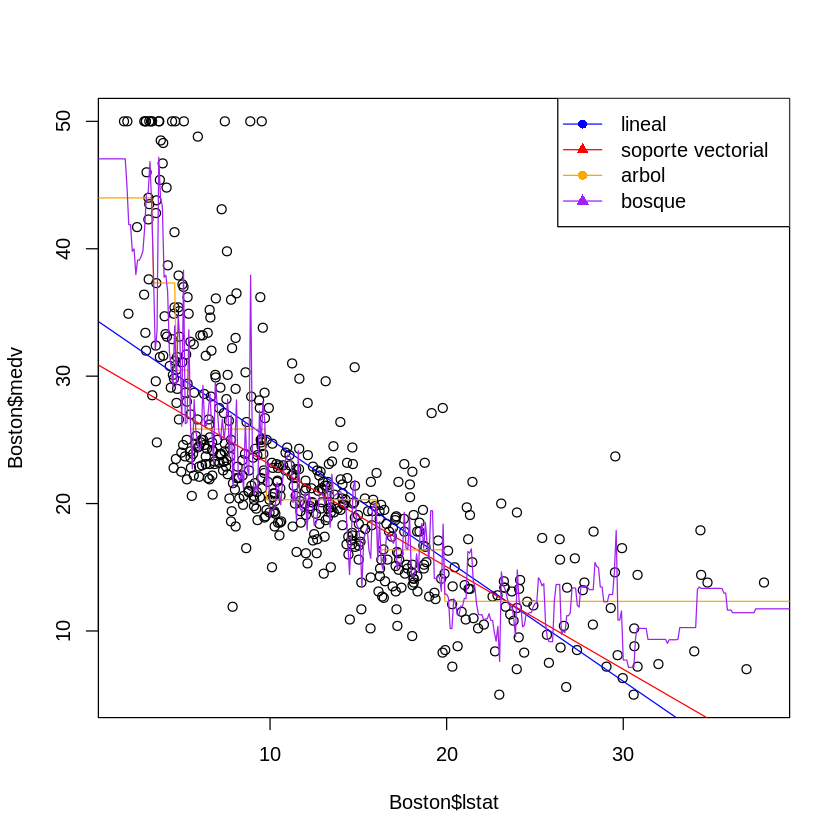

In [ ]:
plot(Boston$lstat,Boston$medv)
lines(rango_lstat_x,predict(modelo_lineal,newdata = rango_lstat),col="blue")
lines(rango_lstat_x,predict(modelo_svm,newdata = rango_lstat),col="red")
lines(rango_lstat_x,predict(modelo_tree,newdata = rango_lstat),col="orange")
lines(rango_lstat_x,predict(modelo_randf,newdata = rango_lstat),col="purple")

legend("topright", legend = c("lineal", "soporte vectorial","arbol","bosque"),
       col = c("blue", "red","orange","purple"), pch = c(16, 17), lty = 1)

In [ ]:
# Evaluar los modelos en el conjunto de prueba
lm_predictions <- predict(modelo_lineal, newdata = Boston)
svm_predictions <- predict(modelo_svm, newdata = Boston)
tree_predictions <- predict(modelo_tree, newdata = Boston)
rf_predictions <- predict(modelo_randf, newdata = Boston)

# Calcular el error cuadrático medio (MSE) para cada modelo
lm_mse <- mean((lm_predictions - Boston$medv)^2)
svm_mse <- mean((svm_predictions - Boston$medv)^2)
tree_mse <- mean((tree_predictions - Boston$medv)^2)
rf_mse <- mean((rf_predictions - Boston$medv)^2)

# Imprimir los resultados
cat("Regresión Lineal MSE:", lm_mse, "\n")
cat("SVM MSE:", svm_mse, "\n")
cat("Árbol de Regresión MSE:", tree_mse, "\n")
cat("Bosques Aleatorios MSE:", rf_mse, "\n")

Regresión Lineal MSE: 38.48297 
SVM MSE: 42.14717 
Árbol de Regresión MSE: 25.72311 
Bosques Aleatorios MSE: 11.03491 


# Metodo de particion

In [ ]:
n = nrow(Boston)

In [ ]:
muestreo <- sample(c("Entrenamiento","Prueba"),prob=c(0.8,0.2),n,replace = TRUE)

In [ ]:
data_train <- Boston[ muestreo=="Entrenamiento",]
data_test  <- Boston[ muestreo=="Prueba",]

# Modelo de regresión lineal
lm_model <- lm(medv ~ lstat, data = data_train)

# Modelo de regresión de soporte vectorial (SVM)
svm_model <- svm(medv ~ lstat, data = data_train, kernel = "linear")

# Modelo de árbol de regresión
tree_model <- rpart(medv ~ lstat, data = data_train, method = "anova")

# Modelo de bosques aleatorios
rf_model <- randomForest(medv ~ lstat, data = data_train, ntree = 10)

# Evaluar los modelos en el conjunto de prueba
lm_predictions <- predict(lm_model, newdata = data_test)
svm_predictions <- predict(svm_model, newdata = data_test)
tree_predictions <- predict(tree_model, newdata = data_test)
rf_predictions <- predict(rf_model, newdata = data_test)

# Calcular el error cuadrático medio (MSE) para cada modelo
lm_mse <- mean((lm_predictions - data_test$medv)^2)
svm_mse <- mean((svm_predictions - data_test$medv)^2)
tree_mse <- mean((tree_predictions - data_test$medv)^2)
rf_mse <- mean((rf_predictions - data_test$medv)^2)

# Imprimir los resultados
cat("Regresión Lineal MSE:", lm_mse, "\n")
cat("SVM MSE:", svm_mse, "\n")
cat("Árbol de Regresión MSE:", tree_mse, "\n")
cat("Bosques Aleatorios MSE:", rf_mse, "\n")

Regresión Lineal MSE: 39.41758 
SVM MSE: 44.45677 
Árbol de Regresión MSE: 26.38472 
Bosques Aleatorios MSE: 31.10004 
